## Shark attacks

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
from shapely.geometry import Point 
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [5]:
sharks = pd.read_excel("GSAF5.xls",  na_values=["UNKNOWN"])

In [6]:
sharks.head()

Case Number                  Date    Year        Type       Country  \
0    2017.07.09           09-Jul-2017  2017.0  Unprovoked           USA   
1    2017.07.07           07-Jul-2017  2017.0  Unprovoked  SOUTH AFRICA   
2    2017.07.02           02-Jul-2017  2017.0     Invalid       COMOROS   
3    2017.06.29           29-Jun-2017  2017.0     Invalid           USA   
4  2017.06.29.R  Reported 29-Jun-2017  2017.0  Unprovoked           USA   

                    Area                           Location  Activity  \
0                Florida  Haulover Beach, Miami-Dade County  Swimming   
1  Eastern Cape Province           Nahoon Reef, East London   Surfing   
2                Anjouan                               Moya   Fishing   
3         South Carolina                 Wrightsville Beach   Fishing   
4         South Carolina                        Hilton Head  Swimming   

                Name Sex      ...                  Species   \
0        Elvin Lanza    M     ...      Bull shark, 4' to 5'   
1          Zoe Stein    F     ...        White shark, 2.5 m   
2                NaN  NaN     ...                       NaN   
3               male    M     ...                       NaN   
4  Olivia Wallhauser    F     ...                       NaN   

        Investigator or Source                          pdf  \
0  Miami-Beach Patch, 7/9/2017         2017.07.09-Lanza.pdf   
1      Dispatch Live, 7/7/2027         2017.07.07-Stein.pdf   
2              Linfo, 7/3/2017       2017.07.02-Comoros.pdf   
3            C. Creswell, GSAF  2017.06.29-Wrightsville.pdf   
4  TriStateHomePage, 6/29/2017  2017.06.29.R-Wallhauser.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...    2017.07.09   
1  http://sharkattackfile.net/spreadsheets/pdf_di...    2017.07.07   
2  http://sharkattackfile.net/spreadsheets/pdf_di...    2017.07.02   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2017.06.29   
4  http://sharkattackfile.net/spreadsheets/pdf_di...  2017.06.29.R   

  Case Number.2 original order Unnamed: 22 Unnamed: 23  
0    2017.07.09         6105.0         NaN         NaN  
1    2017.07.07         6104.0         NaN         NaN  
2    2017.07.02         6103.0         NaN         NaN  
3    2017.06.29         6102.0         NaN         NaN  
4  2017.06.29.R         6101.0         NaN         NaN  

[5 rows x 24 columns]

In [7]:
sharks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [8]:
sharks['number_age'] = pd.to_numeric(sharks['Age'], errors='coerce')

In [9]:
sharks.count()

Case Number               8597
Date                      6104
Year                      6102
Type                      6100
Country                   6058
Area                      5690
Location                  5592
Activity                  5569
Name                      5897
Sex                       5526
Age                       3380
Injury                    6076
Fatal (Y/N)               5980
Time                      2854
Species                   3103
Investigator or Source    6088
pdf                       6104
href formula              6102
href                      6103
Case Number.1             6104
Case Number.2             6104
original order            6104
Unnamed: 22                  1
Unnamed: 23                  2
number_age                3276
dtype: int64

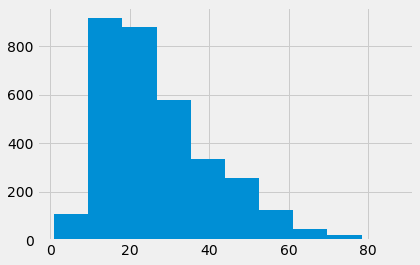

In [10]:
# if I have had Soma's amazing command (pd.to_numeric(sharks['Age'], errors='coerce'), I would have never practiced to much reg ex
sharks['number_age'].hist()

In [11]:
sharks['number_age']


0        46.0
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6        14.0
7        34.0
8        82.0
9         NaN
10       48.0
11        NaN
12       19.0
13       30.0
14        NaN
15       32.0
16       20.0
17        NaN
18       73.0
19       41.0
20       29.0
21       33.0
22       18.0
23        NaN
24       14.0
25       33.0
26       28.0
27        NaN
28        NaN
29       40.0
         ... 
25587     NaN
25588     NaN
25589     NaN
25590     NaN
25591     NaN
25592     NaN
25593     NaN
25594     NaN
25595     NaN
25596     NaN
25597     NaN
25598     NaN
25599     NaN
25600     NaN
25601     NaN
25602     NaN
25603     NaN
25604     NaN
25605     NaN
25606     NaN
25607     NaN
25608     NaN
25609     NaN
25610     NaN
25611     NaN
25612     NaN
25613     NaN
25614     NaN
25615     NaN
25616     NaN
Name: number_age, Length: 25617, dtype: float64

In [12]:
sharks.drop(sharks.columns[[0, 15, 16, 17, 18, 19, 20, 21, 22, 23]], axis=1, inplace=True)

In [13]:
sharks['Year'].describe()

count    6102.000000
mean     1926.346444
std       284.157124
min         0.000000
25%      1942.000000
50%      1976.000000
75%      2004.000000
max      2018.000000
Name: Year, dtype: float64

In [14]:
sharks.rename(columns={"Sex ": "Sex"}, inplace=True)

In [15]:
sharks["Sex"].value_counts().head()

M      4911
F       610
M         2
.         1
lli       1
Name: Sex, dtype: int64

In [16]:
sharks["Sex"].value_counts(dropna=False)

NaN    20091
M       4911
F        610
M          2
.          1
lli        1
N          1
Name: Sex, dtype: int64

In [17]:
sharks.dropna(subset=["Sex"], inplace=True)

In [18]:
sharks["Sex"].unique()

array(['M', 'F', 'M ', 'lli', 'N', '.'], dtype=object)

In [19]:
sharks = sharks[sharks["Sex"].isin(["M","F"])]

In [20]:
sharks["Sex"].head()

0    M
1    F
3    M
4    F
5    M
Name: Sex, dtype: object

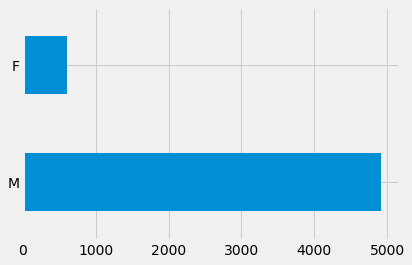

In [21]:
sharks["Sex"].value_counts().plot(kind='barh')

In [22]:
sharks["Country"].value_counts().head()

USA                 2060
AUSTRALIA           1158
SOUTH AFRICA         507
PAPUA NEW GUINEA     114
NEW ZEALAND          111
Name: Country, dtype: int64

In [23]:
sharks["Fatal (Y/N)"].value_counts()

N                 4019
Y                 1419
 N                   8
2017                 1
--M524--M3133Y       1
Name: Fatal (Y/N), dtype: int64

In [24]:
sharks.groupby(["Country", "Fatal (Y/N)"]).sum()

Year  number_age
Country                    Fatal (Y/N)                       
 PHILIPPINES               Y               1944.0         NaN
 TONGA                     N               2000.0        69.0
                           Y               4008.0         NaN
ADMIRALTY ISLANDS          N               1962.0        26.0
ALGERIA                    Y               1844.0         NaN
AMERICAN SAMOA             Y               5867.0        77.0
ANDAMAN / NICOBAR ISLANDAS Y               1958.0        32.0
ANGOLA                     N               1993.0         NaN
ANTIGUA                    N               2011.0         NaN
ARGENTINA                  N               1954.0        18.0
ARUBA                      Y               2015.0        58.0
ASIA?                      N                  0.0         NaN
ATLANTIC OCEAN             N               9876.0         NaN
                           Y              11466.0        47.0
AUSTRALIA                   N             11760.0       166.0
                           N            1568622.0     12762.0
                           Y             625482.0      5669.0
AZORES                     N               5891.0        49.0
BAHAMAS                    N             169472.0      2215.0
                           Y              23393.0       202.0
BAHREIN                    Y                  0.0         NaN
BARBADOS                   N               3598.0        19.0
                           Y               5408.0        16.0
BAY OF BENGAL              Y               1942.0         NaN
BELIZE                     N               2013.0         NaN
                           Y               2006.0        50.0
BERMUDA                    N              15645.0       113.0
                           Y               1959.0        29.0
BRAZIL                     N             107890.0       820.0
                           Y              67806.0       481.0
...                                           ...         ...
THAILAND                   Y               5984.0        56.0
THE BALKANS                Y               1954.0         NaN
TONGA                      N              19905.0        88.0
                           Y               7647.0        24.0
TRINIDAD & TOBAGO          N               3952.0        50.0
                           Y               2012.0        24.0
TUNISIA                    N               1982.0         NaN
                           Y               1909.0         NaN
TURKEY                     N              13631.0        16.0
                           Y               5744.0        36.0
TURKS & CAICOS             N               6024.0       104.0
                           Y               2002.0         NaN
UNITED ARAB EMIRATES       N               4033.0        41.0
UNITED ARAB EMIRATES (UAE) N               4021.0        97.0
UNITED KINGDOM             N              15893.0       237.0
                           Y               3912.0         NaN
URUGUAY                    N               2004.0        21.0
                           Y                  0.0         NaN
USA                        N            3546151.0     34662.0
                           Y             459564.0      3188.0
VANUATU                    N               5957.0        21.0
                           Y              15722.0        15.0
VENEZUELA                  N              11970.0        68.0
                           Y               7424.0        80.0
VIETNAM                    N              22003.0       253.0
                           Y               1868.0         NaN
WESTERN SAMOA              Y               1972.0        25.0
YEMEN                      Y               1955.0         NaN
YEMEN                      N               1906.0         NaN
                           Y               7589.0        46.0

[296 rows x 2 columns]

In [25]:
sharks["Year"].head()

0    2017.0
1    2017.0
3    2017.0
4    2017.0
5    2017.0
Name: Year, dtype: float64

In [26]:
sharks['Year'].replace('.0', '').head()

0    2017.0
1    2017.0
3    2017.0
4    2017.0
5    2017.0
Name: Year, dtype: float64

In [27]:
sharks["Year"].head().astype(int)

0    2017
1    2017
3    2017
4    2017
5    2017
Name: Year, dtype: int64

In [28]:
sharks.tail()

Date  Year        Type             Country               Area  \
6099  Before 1903   0.0  Unprovoked           AUSTRALIA  Western Australia   
6100  Before 1903   0.0  Unprovoked           AUSTRALIA  Western Australia   
6101    1900-1905   0.0  Unprovoked                 USA     North Carolina   
6102    1883-1889   0.0  Unprovoked              PANAMA                NaN   
6103    1845-1853   0.0  Unprovoked  CEYLON (SRI LANKA)   Eastern Province   

                                 Location      Activity  \
6099                          Roebuck Bay        Diving   
6100                                  NaN  Pearl diving   
6101                       Ocracoke Inlet      Swimming   
6102                 Panama Bay 8ºN, 79ºW           NaN   
6103  Below the English fort, Trincomalee      Swimming   

                       Name Sex  Age  \
6099                   male   M  NaN   
6100                  Ahmun   M  NaN   
6101  Coast Guard personnel   M  NaN   
6102        Jules Patterson   M  NaN   
6103                   male   M   15   

                                                 Injury Fatal (Y/N) Time  \
6099                                              FATAL           Y  NaN   
6100                                              FATAL           Y  NaN   
6101                                              FATAL           Y  NaN   
6102                                              FATAL           Y  NaN   
6103  FATAL. "Shark bit him in half, carrying away t...           Y  NaN   

     Species   number_age  
6099      NaN         NaN  
6100      NaN         NaN  
6101      NaN         NaN  
6102      NaN         NaN  
6103      NaN        15.0

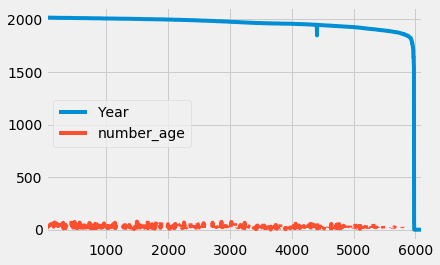

In [29]:
sharks[sharks["Fatal (Y/N)"] == "Y"].plot()

In [30]:
df_fatal= sharks[sharks["Fatal (Y/N)"] == "Y"]

In [31]:
df_fatal

Date    Year          Type  \
21                                          05-May-2017  2017.0    Unprovoked   
26                                          29-Apr-2017  2017.0    Unprovoked   
32                                          17-Apr-2017  2017.0    Unprovoked   
50                                          21-Feb-2017  2017.0    Unprovoked   
96                                          06-Sep-2016  2016.0    Unprovoked   
142                                         05-Jun-2016  2016.0    Unprovoked   
146                                         31-May-2016  2016.0    Unprovoked   
162                                         09-Apr-2016  2016.0    Unprovoked   
173                                         10-Mar-2016  2016.0    Unprovoked   
198                                         19-Dec-2015  2015.0    Unprovoked   
215                                         17-Oct-2015  2015.0    Unprovoked   
255                                         25-Jul-2015  2015.0    Unprovoked   
295                                         09-May-2015  2015.0    Unprovoked   
299                                         29-Apr-2015  2015.0    Unprovoked   
304                                         12-Apr-2015  2015.0    Unprovoked   
307                                         29-Mar-2015  2015.0       Invalid   
310                                         21-Mar-2015  2015.0    Unprovoked   
317                                         14-Feb-2015  2015.0    Unprovoked   
318                                         09-Feb-2015  2015.0    Unprovoked   
334                                         29-Dec-2014  2014.0    Unprovoked   
340                                         15-Dec-2014  2014.0    Unprovoked   
343                                         20-Nov-2014  2014.0      Provoked   
370                                         09-Sep-2014  2014.0    Unprovoked   
395                                            Aug-2014  2014.0       Invalid   
402                                         13-Jul-2014  2014.0       Invalid   
440                                         03-Apr-2014  2014.0    Unprovoked   
441                                         29-Mar-2014  2014.0       Invalid   
442                                         22-Mar-2014  2014.0    Unprovoked   
453                                         08-Feb-2014  2014.0    Unprovoked   
466                                         02-Dec-2013  2013.0    Unprovoked   
...                                                 ...     ...           ...   
6042                                        Before 1961     0.0    Unprovoked   
6050                                       Before  1958     0.0    Unprovoked   
6053                                        Before 1958     0.0    Unprovoked   
6054                                        Before 1958     0.0    Unprovoked   
6055                                        Before 1957     0.0    Unprovoked   
6056                                        Before 1957     0.0      Provoked   
6060                                        Before 1952     0.0    Unprovoked   
6064             Said to be 1941-1945, more likely 1945     0.0    Unprovoked   
6065                                          1941-1945     0.0    Unprovoked   
6066                                          1941-1945     0.0    Unprovoked   
6067                                          1941-1942     0.0    Unprovoked   
6068                                        1940 - 1950     0.0    Unprovoked   
6071                                          1940-1946     0.0  Sea Disaster   
6075                                        Before 1905     0.0    Unprovoked   
6078                                        Early 1930s     0.0    Unprovoked   
6083                                            No date     0.0    Unprovoked   
6084                                         1920 -1923     0.0    Unprovoked   
6087                                        Before 1921     0.0    Unprovoked   
6

In [32]:
df_nonfatal = sharks[sharks["Fatal (Y/N)"] == "N"]
df_nonfatal['Fatal (Y/N)'].value_counts()

N    4019
Name: Fatal (Y/N), dtype: int64

In [33]:
pd.set_option('display.max_columns', 100)

In [34]:
pd.set_option('display.max_rows', 100)

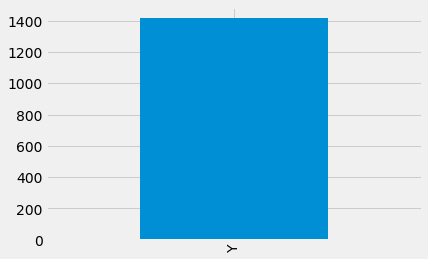

In [35]:
df_fatal['Fatal (Y/N)'].value_counts().plot(kind='bar')

In [36]:
attack = sharks.groupby(['Year','Fatal (Y/N)'])['Area'].count().to_frame().reset_index()

In [37]:
attack[attack['Fatal (Y/N)'] == 'Y'] 

Year Fatal (Y/N)  Area
1       0.0           Y    42
3      77.0           Y     1
4    1543.0           Y     1
5    1580.0           Y     0
6    1642.0           Y     1
8    1700.0           Y     0
10   1721.0           Y     1
11   1738.0           Y     1
12   1742.0           Y     0
13   1748.0           Y     1
15   1751.0           Y     1
17   1764.0           Y     0
19   1771.0           Y     0
20   1774.0           Y     0
21   1776.0           Y     0
22   1779.0           Y     1
23   1785.0           Y     1
24   1786.0           Y     0
25   1787.0           Y     1
26   1791.0           Y     1
27   1800.0           Y     1
29   1805.0           Y     1
31   1811.0           Y     0
34   1817.0           Y     3
37   1825.0           Y     1
39   1826.0           Y     1
41   1827.0           Y     0
43   1828.0           Y     1
45   1829.0           Y     0
46   1830.0           Y     3
47   1831.0           Y     1
49   1834.0           Y     1
51   1835.0           Y     1
53   1837.0           Y     1
55   1839.0           Y     3
57   1840.0           Y     2
58   1841.0           Y     1
60   1842.0           Y     1
61   1844.0           Y     1
63   1845.0           Y     3
64   1846.0           Y     1
66   1847.0           Y     2
68   1848.0           Y     1
69   1849.0           Y     6
70   1850.0           Y     2
72   1851.0           Y     2
74   1852.0           Y     8
76   1853.0           Y     4
79   1855.0           Y     4
80   1856.0           Y     1
..      ...         ...   ...
296  1967.0           Y    11
298  1968.0           Y     4
301  1970.0           Y     8
303  1971.0           Y     5
305  1972.0           Y     7
307  1973.0           Y     7
309  1974.0           Y     7
311  1975.0           Y     6
313  1976.0           Y     6
315  1977.0           Y     5
317  1978.0           Y     4
319  1979.0           Y     8
321  1980.0           Y     4
323  1981.0           Y     8
325  1982.0           Y     8
327  1983.0           Y     7
329  1984.0           Y     7
331  1985.0           Y     5
333  1986.0           Y     2
335  1987.0           Y     6
337  1988.0           Y     8
339  1989.0           Y    11
341  1990.0           Y     4
343  1991.0           Y     5
345  1992.0           Y    12
347  1993.0           Y    14
349  1994.0           Y     9
351  1995.0           Y    11
353  1996.0           Y     7
355  1997.0           Y     9
357  1998.0           Y     9
359  1999.0           Y     5
361  2000.0           Y    13
363  2001.0           Y     7
365  2002.0           Y     9
367  2003.0           Y     9
369  2004.0           Y    12
371  2005.0           Y     7
373  2006.0           Y    12
375  2007.0           Y     7
377  2008.0           Y    12
379  2009.0           Y    14
381  2010.0           Y    10
383  2011.0           Y    16
386  2012.0           Y    11
388  2013.0           Y    14
390  2014.0           Y     9
392  2015.0           Y     7
394  2016.0           Y     5
396  2017.0           Y     4

[207 rows x 3 columns]

In [38]:
attack = attack[(attack["Year"]>1970) & (attack["Year"]<2016)]

In [39]:
sharks

Date    Year          Type  \
0                                           09-Jul-2017  2017.0    Unprovoked   
1                                           07-Jul-2017  2017.0    Unprovoked   
3                                           29-Jun-2017  2017.0       Invalid   
4                                  Reported 29-Jun-2017  2017.0    Unprovoked   
5                                           19-Jun-2017  2017.0    Unprovoked   
6                                           18-Jun-2017  2018.0    Unprovoked   
7                                           18-Jun-2017  2018.0    Unprovoked   
8                                           17-Jun-2017  2017.0    Unprovoked   
9                                  Reported 14-Jun-2017  2017.0    Unprovoked   
10                                          11-Jun-2017  2017.0    Unprovoked   
11                                          10-Jun-2017  2017.0    Unprovoked   
12                                          10-Jun-2017  2017.0    Unprovoked   
13                                 Reported 07-Jun-2017  2017.0    Unprovoked   
14                                          04-Jun-2017  2017.0    Unprovoked   
15                                          02-Jun-2017  2017.0    Unprovoked   
16                                          30-May-2017  2017.0      Provoked   
17                                          28-May-2017  2017.0    Unprovoked   
18                                          27-May-2017  2017.0           NaN   
19                                          12-May-2017  2017.0    Unprovoked   
20                                 Reported 06-May-2017  2017.0      Provoked   
21                                          05-May-2017  2017.0    Unprovoked   
22                                          03-May-2017  2017.0       Invalid   
23                                          29-Apr-2017  2017.0    Unprovoked   
24                                          29-Apr-2017  2017.0    Unprovoked   
25                                          29-Apr-2017  2017.0    Unprovoked   
26                                          29-Apr-2017  2017.0    Unprovoked   
27                                          27-Apr-2017  2017.0    Unprovoked   
28                                          26-Apr-2017  2017.0       Invalid   
29                                          22-Apr-2017  2017.0    Unprovoked   
30                                          20-Apr-2017  2017.0       Invalid   
32                                          17-Apr-2017  2017.0    Unprovoked   
33                                          14-Apr-2017  2017.0    Unprovoked   
34                                          13-Apr-2017  2017.0    Unprovoked   
35                                          12-Apr-2017  2017.0    Unprovoked   
36                                          12-Apr-2017  2017.0       Invalid   
37                                          11-Apr-2017  2017.0    Unprovoked   
38                                          10-Apr-2017  2017.0    Unprovoked   
39                                          10-Apr-2017  2017.0    Unprovoked   
40                                          06-Apr-2017  2017.0    Unprovoked   
41                                          05-Apr-2017  2017.0    Unprovoked   
42                                          02-Apr-2017  2017.0    Unprovoked   
43                                          02-Apr-2017  2017.0    Unprovoked   
44                                          27-Mar-2017  2017.0    Unprovoked   
45                                          19-Mar-2017  2017.0    Unprovoked   
46                                          18-Mar-2017  2017.0    Unprovoked   
47                                 Reported 09-Mar-2017  2017.0    Unprovoked   
48                                          25-Feb-2017  2017.0    Unprovoked   
49                                          24-Feb-2017  2017.0    Unprovoked   
50                                          21-Feb-2017  2017.0    Unprovoked   
5

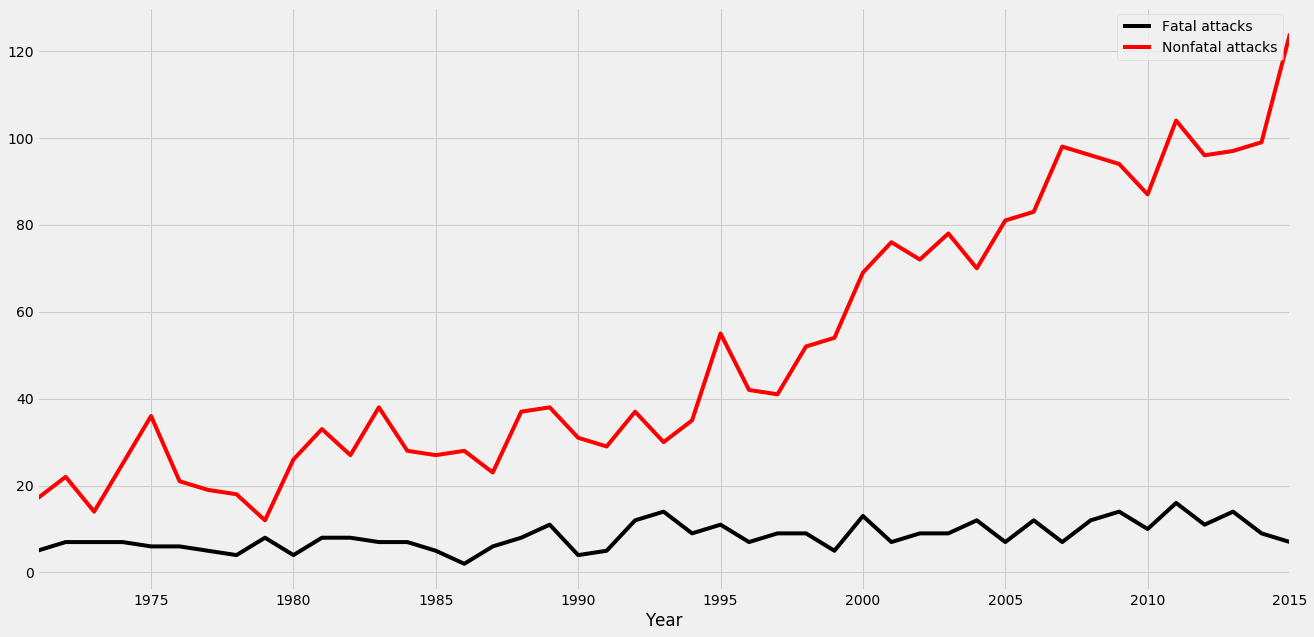

In [40]:
ax = attack[attack['Fatal (Y/N)'] == 'Y'].plot(kind='line', color='black', x='Year', y='Area', figsize=(20,10), label='Fatal attacks') 
attack[attack['Fatal (Y/N)'] == 'N'].plot(kind='line', color='red', x='Year', y='Area', figsize=(20,10), ax=ax, label='Nonfatal attacks')
plt.savefig("fatalattacks.pdf")

In [41]:
sharks['Activity'].value_counts()

Surfing                                                                                                                                                                                                                                         906
Swimming                                                                                                                                                                                                                                        811
Fishing                                                                                                                                                                                                                                         323
Spearfishing                                                                                                                                                                                                                                    308
Bathing                 

In [42]:
swimming = sharks[(sharks["Activity"] == "Swimming") & (sharks['Fatal (Y/N)'] == 'N')]
surfing = sharks[(sharks["Activity"] == "Surfing") & (sharks['Fatal (Y/N)'] == 'N')]
fishing = sharks[(sharks["Activity"] == "Fishing") & (sharks['Fatal (Y/N)'] == 'N')]
wading = sharks[(sharks["Activity"] == "Wading") & (sharks['Fatal (Y/N)'] == 'N')]

In [43]:
swim_counts_fatal = swimming["Year"].value_counts().to_frame().reset_index()
surf_counts_fatal = surfing["Year"].value_counts().to_frame().reset_index()
fish_counts_fatal = fishing["Year"].value_counts().to_frame().reset_index()
wade_counts_fatal = wading["Year"].value_counts().to_frame().reset_index()

In [44]:
swim_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
surf_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
fish_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
wade_counts_fatal.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)

swim_counts_fatal.sort_values(by="Year_",inplace=True)
surf_counts_fatal.sort_values(by="Year_",inplace=True)
fish_counts_fatal.sort_values(by="Year_",inplace=True)
wade_counts_fatal.sort_values(by="Year_",inplace=True)

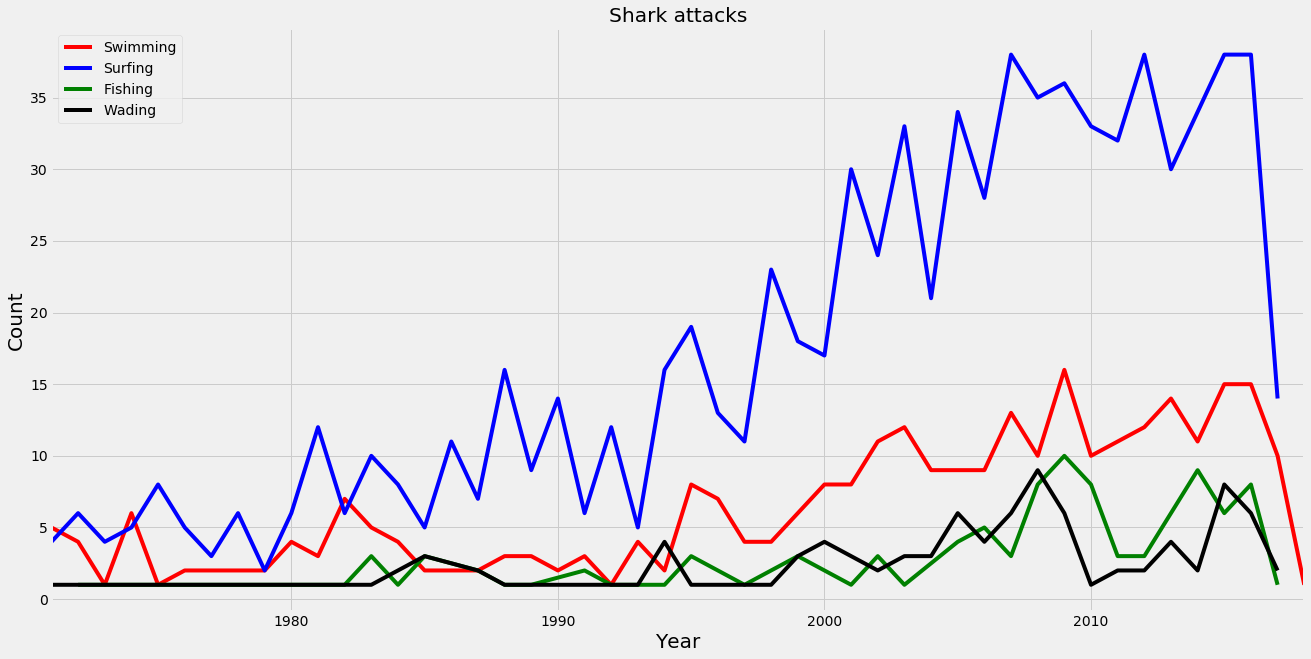

In [45]:
ax = swim_counts_fatal[swim_counts_fatal["Year_"]>1970].plot(title='Shark attacks', kind="line", y='Cases', x='Year_', color='red', label='Swimming', figsize=(20,10))
surf_counts_fatal[surf_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='blue', label='Surfing', ax=ax)
fish_counts_fatal[fish_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='green', label='Fishing', ax=ax)
wade_counts_fatal[wade_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='black', label='Wading', ax=ax)
ax.legend(loc=2)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.savefig("activities.pdf")

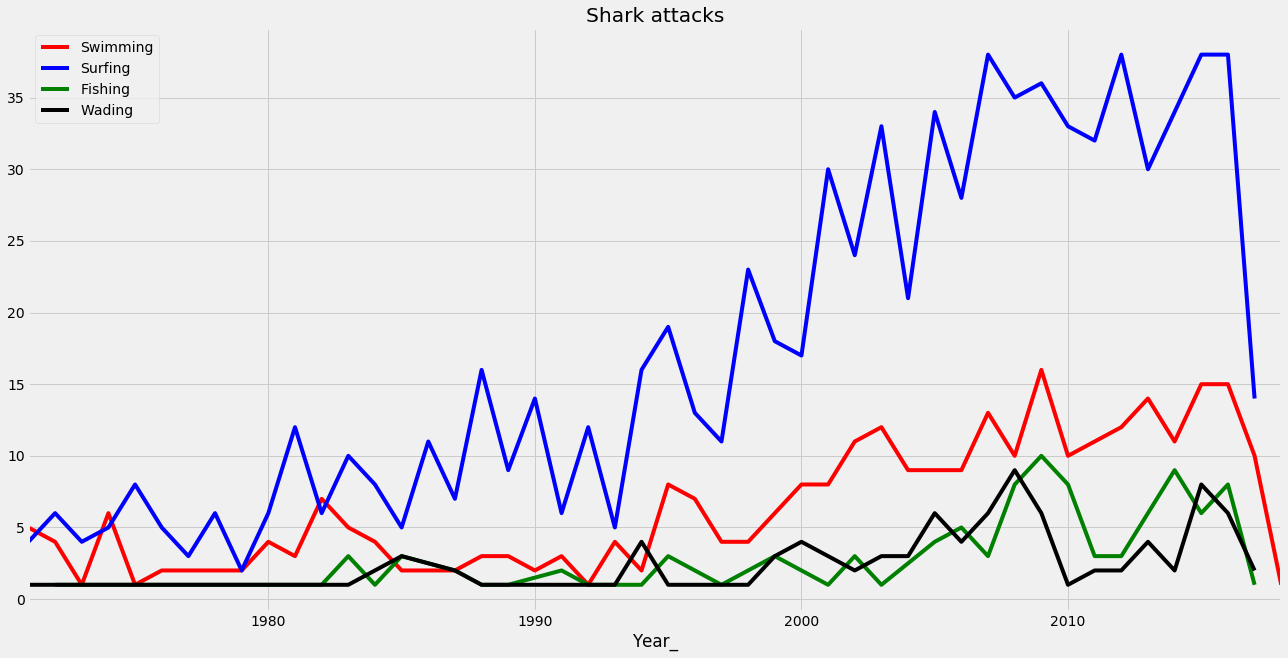

In [46]:
ax = swim_counts_fatal[swim_counts_fatal["Year_"]>1970].plot(title='Shark attacks', kind="line", y='Cases', x='Year_', color='red', label='Swimming', figsize=(20,10))
surf_counts_fatal[surf_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='blue', label='Surfing', ax=ax)
fish_counts_fatal[fish_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='green', label='Fishing', ax=ax)
wade_counts_fatal[wade_counts_fatal["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='black', label='Wading', ax=ax)
ax.legend(loc=2)
#plt.ylabel('Count', fontsize=20)
#plt.xlabel('Year', fontsize=20)
#plt.savefig("neu_activities.pdf")

In [47]:
# all attacks, not only fatal ones
swimming = sharks[(sharks["Activity"] == "Swimming")]
surfing = sharks[(sharks["Activity"] == "Surfing")]
fishing = sharks[(sharks["Activity"] == "Fishing")]
wading = sharks[(sharks["Activity"] == "Wading")]

In [48]:
swim_counts_all = swimming["Year"].value_counts().to_frame().reset_index()
surf_counts_all = surfing["Year"].value_counts().to_frame().reset_index()
fish_counts_all = fishing["Year"].value_counts().to_frame().reset_index()
wade_counts_all = wading["Year"].value_counts().to_frame().reset_index()

In [49]:
swim_counts_all.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
surf_counts_all.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
fish_counts_all.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)
wade_counts_all.rename(columns={'index': 'Year_', 'Year':'Cases'}, inplace=True)

swim_counts_all.sort_values(by="Year_",inplace=True)
surf_counts_all.sort_values(by="Year_",inplace=True)
fish_counts_all.sort_values(by="Year_",inplace=True)
wade_counts_all.sort_values(by="Year_",inplace=True)

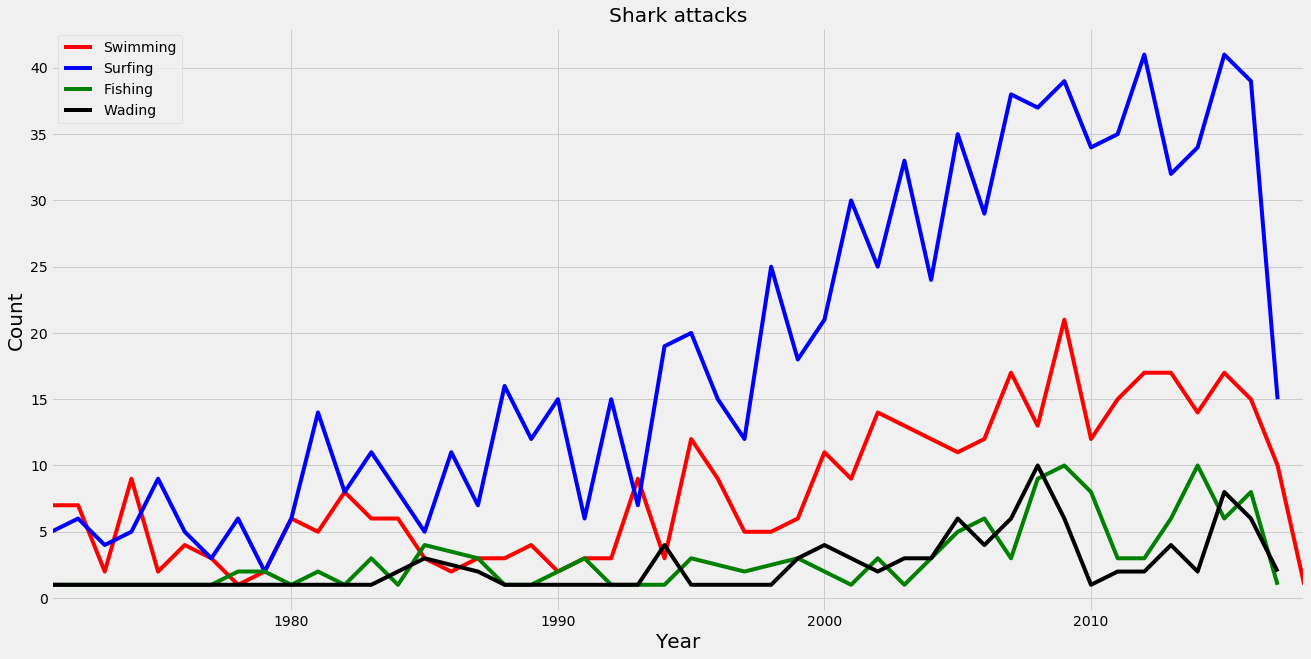

In [50]:
ax = swim_counts_all[swim_counts_all["Year_"]>1970].plot(title='Shark attacks', kind="line", y='Cases', x='Year_', color='red', label='Swimming', figsize=(20,10))
surf_counts_all[surf_counts_all["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='blue', label='Surfing', ax=ax)
fish_counts_all[fish_counts_all["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='green', label='Fishing', ax=ax)
wade_counts_all[wade_counts_all["Year_"]>1970].plot(kind="line", y='Cases', x='Year_', color='black', label='Wading', ax=ax)
ax.legend(loc=2)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.savefig("neu_activities.pdf")

In [51]:
swim_counts_all

Year_  Cases
13      0.0     12
164  1555.0      1
168  1703.0      1
137  1721.0      1
147  1738.0      1
153  1742.0      1
160  1749.0      1
138  1751.0      1
156  1764.0      1
159  1774.0      1
166  1787.0      1
162  1812.0      1
104  1817.0      3
163  1825.0      1
110  1827.0      2
139  1834.0      1
134  1840.0      1
135  1844.0      1
107  1847.0      3
114  1848.0      2
167  1849.0      1
151  1851.0      1
81   1852.0      3
111  1853.0      2
165  1854.0      1
155  1855.0      1
103  1856.0      3
106  1858.0      3
108  1860.0      2
148  1861.0      1
127  1862.0      2
143  1863.0      1
121  1864.0      2
157  1867.0      1
172  1868.0      1
161  1876.0      1
154  1877.0      1
82   1878.0      3
117  1879.0      2
171  1880.0      1
124  1881.0      2
169  1883.0      1
140  1884.0      1
133  1885.0      1
142  1886.0      1
98   1887.0      3
119  1888.0      2
125  1889.0      2
97   1890.0      3
146  1891.0      1
..      ...    ...
149  1969.0      1
21   1970.0      9
36   1971.0      7
38   1972.0      7
123  1973.0      2
24   1974.0      9
120  1975.0      2
78   1976.0      4
84   1977.0      3
152  1978.0      1
116  1979.0      2
48   1980.0      6
59   1981.0      5
29   1982.0      8
46   1983.0      6
51   1984.0      6
105  1985.0      3
118  1986.0      2
100  1987.0      3
92   1988.0      3
65   1989.0      4
128  1990.0      2
86   1991.0      3
101  1992.0      3
22   1993.0      9
95   1994.0      3
12   1995.0     12
23   1996.0      9
57   1997.0      5
55   1998.0      5
42   1999.0      6
17   2000.0     11
25   2001.0      9
7    2002.0     14
10   2003.0     13
15   2004.0     12
16   2005.0     11
11   2006.0     12
2    2007.0     17
9    2008.0     13
0    2009.0     21
14   2010.0     12
6    2011.0     15
3    2012.0     17
1    2013.0     17
8    2014.0     14
4    2015.0     17
5    2016.0     15
19   2017.0     10
173  2018.0      1

[174 rows x 2 columns]

In [52]:
sharks.groupby("Activity")["Sex"].value_counts()

Activity                                                                                                                                                                                                                                                        Sex
                                                                                                                                                                                                                                                                M       1
 a canoe was pursuing a schooner that had forcibily abducted 5 young girls                                                                                                                                                                                      M       1
"Boat accident"                                                                                                                                                                                                 

In [53]:
swimming2 = sharks[(sharks["Activity"] == "Swimming") | (sharks['Fatal (Y/N)'] == 'N')]
surfing2 = sharks[(sharks["Activity"] == "Surfing") | (sharks['Fatal (Y/N)'] == 'N')]
fishing2 = sharks[(sharks["Activity"] == "Fishing") | (sharks['Fatal (Y/N)'] == 'N')]
wading2 = sharks[(sharks["Activity"] == "Wading") | (sharks['Fatal (Y/N)'] == 'N')]

In [54]:
swim2_counts_fatal = swimming["Sex"].value_counts().to_frame().reset_index()
surf2_counts_fatal = surfing["Sex"].value_counts().to_frame().reset_index()
fish2_counts_fatal = fishing["Sex"].value_counts().to_frame().reset_index()
wade2_counts_fatal = wading["Sex"].value_counts().to_frame().reset_index()

In [55]:
male_swimming = swimming[swimming["Sex"] == "M"]
female_swimming = swimming[swimming["Sex"] == "F"]
male_surfing = surfing[surfing["Sex"] == "M"]
female_surfing= surfing[surfing["Sex"] == "M"]
male_fishing = fishing[fishing["Sex"] == "M"]
female_fishing = fishing[fishing["Sex"] == "M"]

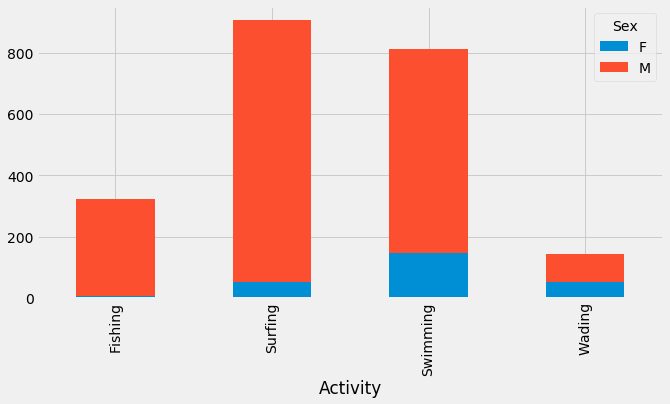

In [56]:
interested = sharks[sharks.Activity.isin(['Swimming', 'Surfing','Wading', 'Fishing'])]
interested.groupby('Activity')['Sex'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,5))
plt.savefig("gender.pdf")

In [57]:
sharks['Sex'].value_counts()

M    4911
F     610
Name: Sex, dtype: int64

In [58]:
sharks['Age']                                 

0             46
1           Teen
3            NaN
4           Teen
5            NaN
6             14
7             34
8             82
9            NaN
10            48
11           NaN
12            19
13            30
14           NaN
15            32
16            20
17           NaN
18            73
19            41
20            29
21            33
22            18
23           NaN
24            14
25            33
26            28
27           20s
28           NaN
29            40
30           NaN
32            17
33            28
34            17
35           NaN
36            68
37            35
38            10
39            21
40            16
41            51
42            39
43            17
44            58
45            30
46           NaN
47            58
48           NaN
49           NaN
50            26
51            26
          ...   
6051         NaN
6052         NaN
6053         NaN
6054         NaN
6055         NaN
6056          50
6057         NaN
6058         N

In [59]:
sharks.dropna(subset=['Age'], inplace=True)

In [60]:
sharks['Age']
sharks.Age.replace('2½', '3',inplace=True, regex=True)
sharks['Age'].value_counts()

19                         82
17                         80
16                         78
15                         74
18                         72
18                         72
20                         71
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
25                         53
22                         53
14                         49
14                         48
21                         48
25                         48
24                         47
23                         47
13                         44
13                         44
26                         43
29                         42
28                         42
12                         39
26                         39
27                         39
27                         38
30                         38
32        

In [61]:
sharks['Age']
sharks.Age.replace('^ ', '3',inplace=True, regex=True)
sharks['Age'].value_counts()

19                         82
17                         80
16                         78
15                         74
18                         72
18                         72
20                         71
17                         69
21                         67
20                         66
22                         60
15                         59
19                         56
16                         56
24                         55
25                         53
22                         53
14                         49
25                         48
21                         48
14                         48
24                         47
23                         47
13                         44
13                         44
26                         43
29                         42
28                         42
27                         39
26                         39
12                         39
27                         38
30                         38
32        

In [62]:
sharks['Age']
sharks.Age.replace('>', '',inplace=True, regex=True)
sharks['Age'].value_counts()

19                         82
17                         80
16                         78
15                         74
18                         72
18                         72
20                         71
17                         69
21                         67
20                         66
22                         60
15                         59
19                         56
16                         56
24                         55
22                         53
25                         53
14                         49
25                         48
21                         48
14                         48
24                         47
23                         47
13                         44
13                         44
26                         43
29                         42
28                         42
27                         39
12                         39
26                         39
30                         38
27                         38
32        

In [63]:
sharks['Age']
sharks.Age.replace('9 months', '1',inplace=True, regex=True)
sharks['Age'].value_counts()

19                         82
17                         80
16                         78
15                         74
18                         72
18                         72
20                         71
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
22                         53
25                         53
14                         49
25                         48
21                         48
14                         48
23                         47
24                         47
13                         44
13                         44
26                         43
28                         42
29                         42
27                         39
12                         39
26                         39
27                         38
30                         38
32        

In [64]:
sharks['Age']
sharks.Age.replace('6½', '7',inplace=True, regex=True)
sharks['Age'].value_counts()

19                         82
17                         80
16                         78
15                         74
18                         72
18                         72
20                         71
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
22                         53
25                         53
14                         49
21                         48
25                         48
14                         48
23                         47
24                         47
13                         44
13                         44
26                         43
29                         42
28                         42
12                         39
26                         39
27                         39
30                         38
27                         38
32        

In [65]:
sharks['Age']
sharks.Age.replace('mid-30s', '35',inplace=True, regex=True)
sharks['Age'].value_counts()

19                         82
17                         80
16                         78
15                         74
18                         72
18                         72
20                         71
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
25                         53
22                         53
14                         49
14                         48
25                         48
21                         48
24                         47
23                         47
13                         44
13                         44
26                         43
28                         42
29                         42
27                         39
26                         39
12                         39
27                         38
30                         38
32        

In [66]:
sharks['Age']
sharks.Age.replace('(adult)', '30',inplace=True, regex=True)
sharks['Age'].value_counts()

19                         82
17                         80
16                         78
15                         74
18                         72
18                         72
20                         71
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
25                         53
22                         53
14                         49
25                         48
14                         48
21                         48
23                         47
24                         47
13                         44
13                         44
26                         43
28                         42
29                         42
30                         39
26                         39
12                         39
27                         39
27                         38
32        

In [67]:
sharks['Age']
sharks.Age.replace('()', '',inplace=True, regex=True)
sharks['Age'].value_counts().head()

19    82
17    80
16    78
15    74
18    72
Name: Age, dtype: int64

In [68]:
sharks['Age']
sharks.Age.replace('or 20', '',inplace=True, regex=True)
sharks['Age'].value_counts()

19                         82
17                         80
16                         78
15                         74
18                         72
18                         72
20                         71
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
25                         53
22                         53
14                         49
25                         48
14                         48
21                         48
23                         47
24                         47
13                         44
13                         44
26                         43
28                         42
29                         42
30                         39
26                         39
12                         39
27                         39
27                         38
32        

In [69]:
sharks['Age']
sharks.Age.replace('Teen', '15',inplace=True, regex=True)
sharks['Age'].value_counts()

15                         85
19                         82
17                         80
16                         78
18                         72
18                         72
20                         71
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
22                         53
25                         53
14                         49
25                         48
14                         48
21                         48
23                         47
24                         47
13                         44
13                         44
26                         43
28                         42
29                         42
12                         39
26                         39
30                         39
27                         39
27                         38
32        

In [70]:
sharks['Age']
sharks.Age.replace('teen', '15',inplace=True, regex=True)
sharks['Age'].value_counts()

15                         90
19                         82
17                         80
16                         78
18                         72
18                         72
20                         71
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
25                         53
22                         53
14                         49
21                         48
25                         48
14                         48
23                         47
24                         47
13                         44
13                         44
26                         43
28                         42
29                         42
26                         39
30                         39
27                         39
12                         39
27                         38
32        

In [71]:
sharks['Age']
sharks.Age.replace('young', '20',inplace=True, regex=True)
sharks['Age'].value_counts()

15                         90
19                         82
17                         80
16                         78
20                         73
18                         72
18                         72
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
22                         53
25                         53
14                         49
14                         48
21                         48
25                         48
23                         47
24                         47
13                         44
13                         44
26                         43
29                         42
28                         42
27                         39
30                         39
26                         39
12                         39
27                         38
32        

In [72]:
sharks['Age']
sharks.Age.replace('Elderly', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

15                         90
19                         82
17                         80
16                         78
20                         73
18                         72
18                         72
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
25                         53
22                         53
14                         49
21                         48
25                         48
14                         48
23                         47
24                         47
13                         44
13                         44
26                         43
29                         42
28                         42
12                         39
27                         39
26                         39
30                         39
27                         38
32        

In [73]:
sharks['Age']
sharks.Age.replace('mid-s ', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

15                         90
19                         82
17                         80
16                         78
20                         73
18                         72
18                         72
17                         69
21                         67
20                         66
22                         60
15                         59
16                         56
19                         56
24                         55
25                         53
22                         53
14                         49
21                         48
25                         48
14                         48
23                         47
24                         47
13                         44
13                         44
26                         43
29                         42
28                         42
12                         39
27                         39
26                         39
30                         39
27                         38
32        

In [74]:
sharks['Age']
sharks.Age.replace('s', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                         91
19                         82
17                         80
20                         80
16                         78
18                         72
18                         72
17                         69
21                         67
20                         66
22                         60
15                         59
19                         56
16                         56
24                         55
25                         53
22                         53
14                         49
21                         48
14                         48
25                         48
23                         47
24                         47
30                         46
13                         44
13                         44
26                         43
29                         42
28                         42
26                         39
12                         39
27                         39
27                         38
32        

In [75]:
sharks['Age']
sharks.Age.replace(' or', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                         91
19                         82
17                         80
20                         80
16                         78
18                         72
18                         72
17                         69
21                         67
20                         66
22                         60
15                         59
19                         56
16                         56
24                         55
25                         53
22                         53
14                         49
21                         48
25                         48
14                         48
24                         47
23                         47
30                         46
13                         44
13                         44
26                         43
29                         42
28                         42
12                         39
26                         39
27                         39
27                         38
32        

In [76]:
sharks['Age']
sharks.Age.replace(' &', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                       91
19                       82
17                       80
20                       80
16                       78
18                       72
18                       72
17                       69
21                       67
20                       66
22                       60
15                       59
19                       56
16                       56
24                       55
22                       53
25                       53
14                       49
25                       48
21                       48
14                       48
24                       47
23                       47
30                       46
13                       44
13                       44
26                       43
29                       42
28                       42
26                       39
12                       39
27                       39
27                       38
32                       37
30                       36
28                  

In [77]:
sharks['Age']
sharks.Age.replace(' to', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                       91
19                       82
20                       80
17                       80
16                       78
18                       72
18                       72
17                       69
21                       67
20                       66
22                       60
15                       59
16                       56
19                       56
24                       55
25                       53
22                       53
14                       49
14                       48
21                       48
25                       48
24                       47
23                       47
30                       46
13                       44
13                       44
26                       43
29                       42
28                       42
12                       39
27                       39
26                       39
27                       38
32                       37
30                       36
29                  

In [78]:
sharks['Age']
sharks.Age.replace('Both', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                       91
19                       82
20                       80
17                       80
16                       78
18                       72
18                       72
17                       69
21                       67
20                       66
22                       60
15                       59
16                       56
19                       56
24                       55
25                       53
22                       53
14                       49
25                       48
21                       48
14                       48
23                       47
24                       47
30                       46
13                       44
13                       44
26                       43
28                       42
29                       42
12                       39
27                       39
26                       39
27                       38
32                       37
30                       36
28                  

In [79]:
sharks['Age']
sharks.Age.replace(' ?', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                 91
19                 82
20                 81
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
16                 56
19                 56
24                 55
25                 53
22                 53
14                 49
25                 48
21                 48
14                 48
23                 47
24                 47
30                 46
13                 44
13                 44
26                 43
28                 42
29                 42
12                 39
26                 39
27                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
35                 33
23                 33
12                 31
40                 29
32                 28
10                 28
43                 27
37        

In [80]:
sharks['Age']
sharks.Age.replace(',,,,?', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                 91
19                 82
20                 81
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
16                 56
19                 56
24                 55
25                 53
22                 53
14                 49
25                 48
21                 48
14                 48
23                 47
24                 47
30                 46
13                 44
13                 44
26                 43
28                 42
29                 42
12                 39
26                 39
27                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
35                 33
23                 33
12                 31
40                 29
32                 28
10                 28
43                 27
37        

In [81]:
sharks['Age']
sharks.Age.replace('X', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                 91
19                 82
20                 81
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
16                 56
19                 56
24                 55
25                 53
22                 53
14                 49
25                 48
21                 48
14                 48
23                 47
24                 47
30                 46
13                 44
13                 44
26                 43
28                 42
29                 42
12                 39
26                 39
27                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
23                 33
35                 33
12                 31
40                 29
32                 28
10                 28
43                 27
38        

In [82]:
sharks['Age']
sharks.Age.replace('A.M.', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15              91
19              82
20              81
17              80
16              78
18              73
18              72
17              69
21              67
20              66
22              60
15              59
16              56
19              56
24              55
25              53
22              53
14              49
14              48
21              48
25              48
24              47
23              47
30              46
13              44
13              44
26              43
29              42
28              42
27              39
12              39
26              39
27              38
32              37
30              36
29              35
28              35
35              34
23              33
35              33
12              31
40              29
10              28
32              28
43              27
38              26
37              26
34              25
31              25
40              25
                ..
28,2330          1
1213        

In [83]:
sharks['Age']
sharks.Age.replace('F', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                 91
19                 82
20                 81
17                 80
16                 78
18                 73
18                 72
17                 69
21                 67
20                 66
22                 60
15                 59
16                 56
19                 56
24                 55
25                 53
22                 53
14                 49
14                 48
21                 48
25                 48
24                 47
23                 47
30                 46
13                 44
13                 44
26                 43
28                 42
29                 42
12                 39
26                 39
27                 39
27                 38
32                 37
30                 36
29                 35
28                 35
35                 34
23                 33
35                 33
12                 31
40                 29
32                 28
10                 28
43                 27
38        

In [84]:
sharks['Age']
sharks.Age.replace('mid-', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15              91
19              82
20              82
17              80
16              78
18              73
18              72
17              69
21              67
20              66
22              60
15              59
19              56
16              56
24              55
22              53
25              53
14              49
14              48
21              48
25              48
23              47
24              47
30              46
13              44
13              44
26              43
28              42
29              42
27              39
12              39
26              39
27              38
32              37
30              36
29              35
28              35
35              34
35              33
23              33
12              31
40              29
32              28
10              28
43              27
37              26
38              26
31              25
34              25
40              25
                ..
3230             1
28,2330     

In [85]:
sharks['Age']
sharks.Age.replace('"\w"', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15              91
19              82
20              82
17              80
16              78
18              73
18              72
17              69
21              67
20              66
22              60
15              59
19              56
16              56
24              55
22              53
25              53
14              49
14              48
21              48
25              48
23              47
24              47
30              46
13              44
13              44
26              43
28              42
29              42
27              39
12              39
26              39
27              38
32              37
30              36
29              35
28              35
35              34
35              33
23              33
12              31
40              29
32              28
10              28
43              27
37              26
38              26
31              25
34              25
40              25
                ..
3230             1
28,2330     

In [86]:
sharks['Age']
sharks.Age.replace('"middle-age"', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

15            91
20            82
19            82
17            80
16            78
18            73
18            72
17            69
21            67
20            66
22            60
15            59
16            56
19            56
24            55
25            53
22            53
14            49
21            48
14            48
25            48
24            47
23            47
30            46
13            44
13            44
26            43
29            42
28            42
12            39
27            39
26            39
27            38
32            37
30            36
28            35
29            35
35            34
35            33
23            33
12            31
40            29
10            28
32            28
43            27
38            26
37            26
31            25
34            25
40            25
              ..
28,2330        1
3230           1
328            1
2320           1
69             1
1213           1
60'            1
4634          

In [87]:
sharks['Age']
sharks.Age.replace(',+', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

15                     91
20                     82
19                     82
17                     80
16                     78
18                     73
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
16                     56
19                     56
24                     55
22                     53
25                     53
14                     49
14                     48
25                     48
21                     48
23                     47
24                     47
30                     46
13                     44
13                     44
26                     43
29                     42
28                     42
26                     39
27                     39
12                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
23          

In [88]:
sharks['Age']
sharks.Age.replace('"\d+"', '60',inplace=True, regex=True)
sharks['Age'].value_counts()

15                     91
20                     82
19                     82
17                     80
16                     78
18                     73
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
16                     56
19                     56
24                     55
25                     53
22                     53
14                     49
21                     48
25                     48
14                     48
24                     47
23                     47
30                     46
13                     44
13                     44
26                     43
29                     42
28                     42
27                     39
12                     39
26                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
35          

In [89]:
sharks['Age']
sharks.Age.replace('month', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                     91
20                     82
19                     82
17                     80
16                     78
18                     74
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
16                     56
19                     56
24                     55
22                     53
25                     53
14                     49
14                     48
25                     48
21                     48
24                     47
23                     47
30                     46
13                     44
13                     44
26                     43
29                     42
28                     42
12                     39
26                     39
27                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
23          

In [90]:
sharks['Age']
sharks.Age.replace('Ca.', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                     91
20                     82
19                     82
17                     80
16                     78
18                     74
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
19                     56
16                     56
24                     55
25                     53
22                     53
14                     49
25                     48
21                     48
14                     48
24                     47
23                     47
30                     46
13                     44
13                     44
26                     43
29                     42
28                     42
27                     39
12                     39
26                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
35          

In [91]:
sharks['Age']
sharks.Age.replace('()', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                     91
20                     82
19                     82
17                     80
16                     78
18                     74
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
19                     56
16                     56
24                     55
25                     53
22                     53
14                     49
25                     48
21                     48
14                     48
24                     47
23                     47
30                     46
13                     44
13                     44
26                     43
29                     42
28                     42
27                     39
12                     39
26                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
35          

In [92]:
sharks['Age'].value_counts()

15                     91
20                     82
19                     82
17                     80
16                     78
18                     74
18                     72
17                     69
21                     67
20                     66
22                     60
15                     59
19                     56
16                     56
24                     55
25                     53
22                     53
14                     49
25                     48
21                     48
14                     48
24                     47
23                     47
30                     46
13                     44
13                     44
26                     43
29                     42
28                     42
27                     39
12                     39
26                     39
27                     38
32                     37
30                     36
28                     35
29                     35
35                     34
35          

In [93]:
sharks['Age']
sharks.Age.replace('[?]', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                    91
20                    83
19                    82
17                    80
16                    78
18                    74
18                    72
17                    69
21                    68
20                    66
22                    60
15                    59
19                    57
16                    56
24                    55
25                    53
22                    53
14                    50
21                    48
25                    48
14                    48
24                    47
23                    47
30                    46
13                    44
13                    44
26                    43
29                    42
28                    42
12                    39
26                    39
27                    39
27                    38
32                    37
30                    36
29                    35
28                    35
35                    34
23                    33
35                    33


In [94]:
sharks['Age']
sharks.Age.replace('[()]', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                    91
20                    83
19                    82
17                    80
16                    78
18                    74
18                    72
17                    69
21                    68
20                    66
22                    60
15                    59
19                    57
16                    56
24                    55
25                    53
22                    53
14                    50
14                    48
21                    48
25                    48
24                    47
30                    47
23                    47
13                    44
13                    44
26                    43
29                    42
28                    42
26                    39
27                    39
12                    39
27                    38
32                    37
30                    36
28                    35
29                    35
35                    34
35                    33
23                    33


In [95]:
sharks['Age']
sharks.Age.replace('\'', '',inplace=True, regex=True)
sharks['Age'].value_counts()

15                    91
20                    83
19                    82
17                    80
16                    78
18                    74
18                    72
17                    69
21                    68
20                    66
22                    60
15                    59
19                    57
16                    56
24                    55
22                    53
25                    53
14                    50
21                    48
14                    48
25                    48
23                    47
24                    47
30                    47
13                    44
13                    44
26                    43
28                    42
29                    42
26                    39
27                    39
12                    39
27                    38
32                    37
30                    36
29                    35
28                    35
35                    34
23                    33
35                    33


In [96]:
sharks['Age']
sharks.Age.replace('13 or 14', '13',inplace=True, regex=True)
sharks['Age'].value_counts()

15                    91
20                    83
19                    82
17                    80
16                    78
18                    74
18                    72
17                    69
21                    68
20                    66
22                    60
15                    59
19                    57
16                    56
24                    55
22                    53
25                    53
14                    50
21                    48
14                    48
25                    48
23                    47
24                    47
30                    47
13                    44
13                    44
26                    43
28                    42
29                    42
26                    39
27                    39
12                    39
27                    38
32                    37
30                    36
29                    35
28                    35
35                    34
23                    33
35                    33


In [97]:
sharks['Age']
sharks.Age.replace('(\d\d\d)', '', inplace=True, regex=True)
sharks['Age'].value_counts()

15    91
20    83
19    82
17    80
16    78
18    74
18    72
17    69
21    68
20    66
22    60
15    59
19    57
16    56
24    55
22    53
25    53
14    50
21    48
25    48
30    48
14    48
23    47
24    47
13    44
13    44
26    43
29    42
28    42
27    39
12    39
26    39
27    38
32    37
30    36
28    35
29    35
35    34
23    33
35    33
12    31
40    29
10    28
32    28
43    27
38    26
37    26
31    25
34    25
40    25
      ..
69     7
5      6
58     6
59     6
61     6
53     6
54     6
57     6
56     6
7      5
59     5
6      5
62     5
68     5
70     4
5      3
56     3
78     3
65     3
2      3
73     3
62     3
66     3
63     2
1      2
77     2
74     2
71     2
65     2
4      2
0      2
64     2
70     2
75     2
64     2
68     2
1      1
3      1
       1
66     1
69     1
81     1
86     1
87     1
84     1
71     1
67     1
72     1
77     1
82     1
Name: Age, Length: 154, dtype: int64

In [98]:
sharks['Age']

0       46
1       15
4       15
6       14
7       34
8       82
10      48
12      19
13      30
15      32
16      20
18      73
19      41
20      29
21      33
22      18
24      14
25      33
26      28
27      20
29      40
32      17
33      28
34      17
36      68
37      35
38      10
39      21
40      16
41      51
42      39
43      17
44      58
45      30
47      58
50      26
51      26
52      22
56      37
57      15
58      55
59      57
61      48
62      35
63      47
64      20
65      16
67      55
68      61
69      19
        ..
5697    11
5704    15
5720     3
5736    27
5748    30
5753    40
5754    40
5755    13
5756    39
5757    40
5758    17
5763    35
5773    17
5779    13
5785    18
5789    26
5790    17
5792    28
5797    18
5798    18
5815    21
5818    22
5821    22
5824    17
5828     3
5845     1
5861    15
5864    19
5881    78
5891    29
5893    12
5904    52
5910    17
5927    22
5947    20
5956    14
5963    19
5986    20
5991    15
6002    21

In [99]:
#sharks['Age']
#sharks.Age.replace('1314', '',inplace=True, regex=True)
#sharks['Age'].value_counts()

In [100]:
#sharks['Age'].astype(str)#.astype(int)

In [101]:
sharks['Fatal (Y/N)']

0         N
1         N
4         N
6         N
7         N
8         N
10        N
12        N
13        N
15        N
16        N
18        N
19        N
20        N
21        Y
22        N
24        N
25        N
26        Y
27        N
29        N
32        Y
33        N
34        N
36      NaN
37        N
38        N
39        N
40        N
41        N
42        N
43        N
44        N
45        N
47        N
50        Y
51        N
52        N
56        N
57        N
58        N
59        N
61        N
62      NaN
63        N
64        N
65        N
67        N
68        N
69        N
       ... 
5697      N
5704      N
5720      Y
5736      N
5748      Y
5753      N
5754      N
5755      N
5756      N
5757      N
5758      N
5763      Y
5773      N
5779      N
5785      Y
5789      Y
5790      Y
5792      N
5797      Y
5798      Y
5815    NaN
5818      Y
5821      Y
5824    NaN
5828      Y
5845    NaN
5861      N
5864      Y
5881      Y
5891      N
5893      Y
5904      Y
5910

In [102]:
sharks.dropna(subset=['Fatal (Y/N)'], inplace=True)

In [103]:
sharks.dropna(subset=['Age'], inplace=True)

In [104]:
#sharks['Age'] == sharks[['Age']([sharks['Age']]<100)]
#attack = attack[(attack["Year"]>1970)]

In [105]:
age_injuries = sharks.groupby('Age')['Area'].count().sort_values().to_frame()

In [106]:
age_injuries = age_injuries.reset_index()
age_injuries.dtypes

Age     object
Area     int64
dtype: object

In [107]:
age_injuries

Age  Area
0     1     1
1    87     1
2    86     1
3    81     1
4    77     1
5    69     1
6    67     1
7     0     1
8    84     1
9    82     1
10   77     1
11   72     1
12   71     1
13   68     1
14   66     1
15    1     1
16          1
17    3     1
18   74     2
19   71     2
20   66     2
21   65     2
22   64     2
23    4     2
24   63     2
25   64     2
26   75     2
27   70     2
28   65     3
29   78     3
30   62     3
31    2     3
32   73     3
33   56     3
34    5     3
35   70     4
36   58     5
37   62     5
38   59     5
39    6     5
40    5     5
41   68     5
42    7     5
43   54     6
44   61     6
45   56     6
46   59     6
47   53     6
48   57     6
49   60     7
..   ..   ...
104  34    23
105  31    24
106  43    25
107  38    25
108  31    25
109  37    26
110  32    27
111  40    28
112  10    28
113  35    30
114  12    30
115  35    33
116  23    33
117  28    33
118  32    34
119  30    35
120  29    35
121  27    36
122  27    38
123  26    39
124  28    39
125  12    39
126  26    41
127  29    41
128  13    44
129  13    44
130  30    45
131  14    45
132  25    46
133  23    47
134  24    47
135  21    48
136  22    48
137  14    48
138  24    51
139  25    53
140  16    54
141  19    56
142  15    58
143  22    58
144  21    61
145  20    63
146  17    68
147  18    72
148  18    72
149  17    74
150  16    77
151  20    77
152  19    81
153  15    89

[154 rows x 2 columns]

In [108]:
age_injuries = age_injuries[age_injuries['Age'].notnull()]

In [109]:
age_injuries.drop(age_injuries.index[74], inplace=True)

In [110]:
age_injuries.drop(age_injuries.index[76], inplace=True)

In [111]:
#age_injuries = age_injuries[(age_injuries['Age']<100)]
#attack = attack[(attack["Year"]>1970) & (attack["Year"]<2017)]

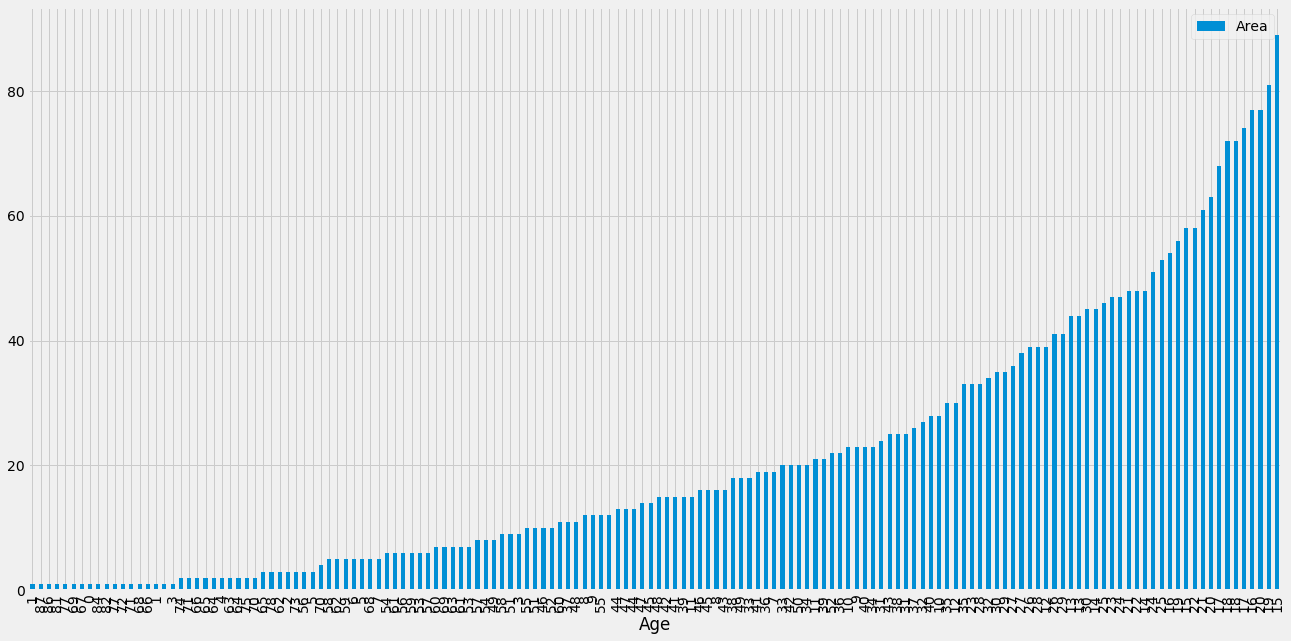

In [112]:
age_injuries.plot(kind='bar', x='Age', figsize=(20,10), xlim=(0-100))

In [113]:
sharks['Age']

0       46
1       15
4       15
6       14
7       34
8       82
10      48
12      19
13      30
15      32
16      20
18      73
19      41
20      29
21      33
22      18
24      14
25      33
26      28
27      20
29      40
32      17
33      28
34      17
37      35
38      10
39      21
40      16
41      51
42      39
43      17
44      58
45      30
47      58
50      26
51      26
52      22
56      37
57      15
58      55
59      57
61      48
63      47
64      20
65      16
67      55
68      61
69      19
70      36
71      20
        ..
5681    19
5691    14
5695    11
5697    11
5704    15
5720     3
5736    27
5748    30
5753    40
5754    40
5755    13
5756    39
5757    40
5758    17
5763    35
5773    17
5779    13
5785    18
5789    26
5790    17
5792    28
5797    18
5798    18
5818    22
5821    22
5828     3
5861    15
5864    19
5881    78
5891    29
5893    12
5904    52
5910    17
5927    22
5947    20
5956    14
5963    19
5986    20
5991    15
6002    21

In [114]:
pd.set_option('display.max_rows', 3300)

In [115]:
sharks['Age']

0       46
1       15
4       15
6       14
7       34
8       82
10      48
12      19
13      30
15      32
16      20
18      73
19      41
20      29
21      33
22      18
24      14
25      33
26      28
27      20
29      40
32      17
33      28
34      17
37      35
38      10
39      21
40      16
41      51
42      39
43      17
44      58
45      30
47      58
50      26
51      26
52      22
56      37
57      15
58      55
59      57
61      48
63      47
64      20
65      16
67      55
68      61
69      19
70      36
71      20
72      65
73      73
74      58
75      41
76      42
77      36
78      36
80      66
82      25
83      29
84      21
85      32
86      17
87      16
88      36
89      43
90      43
94      60
95      51
96      50
97      12
99       9
100     22
102     25
103     37
104     20
105     49
106     15
107     21
108     22
109     40
110     72
112     43
113     18
114     29
115     36
117     31
119      9
120     11
121     61
124     10

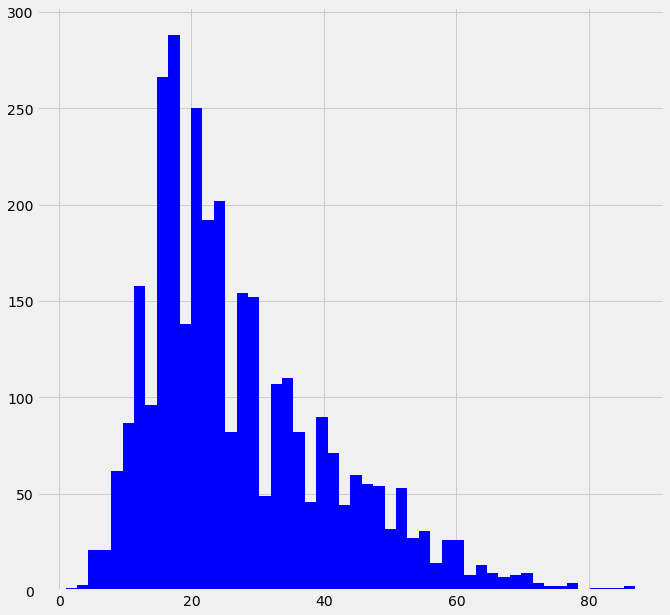

In [116]:
sharks['number_age'].hist(color='blue', figsize=(10,10), bins=50, label='Age of the victims')
plt.savefig("age.pdf")

In [117]:
sharks_surfing = sharks[sharks["Activity"] == 'Surfing']

In [118]:
sharks_surfing.plot(kind='barh', ax=ax) #df.plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', ax=ax)

In [119]:
surf = sharks[(sharks["Activity"] == "Surfing")]

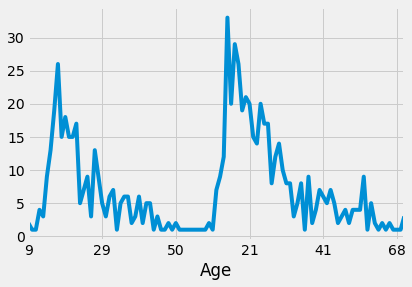

In [120]:
surf.groupby('Age')['Activity'].count().plot()

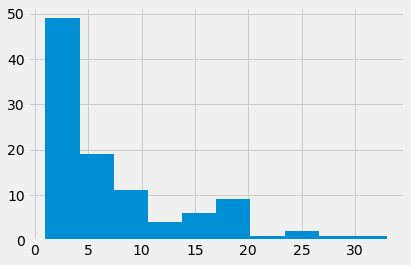

In [121]:
surf['Age'].value_counts().hist()

In [122]:
surf['number_age'].value_counts().mean()

13.0

In [123]:
df_surf = sharks[sharks["Activity"] == "Surfing"]

In [124]:
df_surf['number_age'].mean()

25.906593406593405